In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

# 평가

## 정확도

In [13]:
# 타이타닉 생존자 예측

In [14]:
titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음.
    def fit(selft, X, y = None):
        pass
    
    # predict() 메서드는 단순히 Sex 피쳐가 1이면 0, 아니면 1로 예측함
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [21]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 가공, 학습 / 테스트 데이터 분할
y_titanic = titanic['Survived']
X_titanic = titanic.drop('Survived', axis = 1)
X_titanic = transform_features(X_titanic)
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic,
                                                   test_size = 0.2, random_state = 0)

In [23]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
140,3,0,29.699118,0,2,15.2458,7,0
439,2,1,31.000000,0,0,10.5000,7,3
817,2,1,31.000000,1,1,37.0042,7,0
378,3,1,20.000000,0,0,4.0125,7,0
491,3,1,21.000000,0,0,7.2500,7,3
...,...,...,...,...,...,...,...,...
835,1,0,39.000000,1,1,83.1583,4,0
192,3,0,19.000000,1,0,7.8542,7,3
629,3,1,29.699118,0,0,7.7333,7,2
559,3,0,36.000000,1,0,17.4000,7,3


In [24]:
# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행
my_clf = MyDummyClassifier()
my_clf.fit(X_train, y_train)

my_prediction = my_clf.predict(X_test)
print('MyDummyClassifier의 정확도는 :{0:.4f}'.format(accuracy_score(y_test, my_prediction)))

MyDummyClassifier의 정확도는 :0.7877


MNIST 데이터 세트

In [43]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(sel, X):
        return np.zeros((len(X), 1), dtype = bool)

In [44]:
# 사이킷런의 내장 데이터 셋인 load_digits()를 이용하여 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, else False (0으로 변환)
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

In [46]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 데이터 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fake_clf = MyFakeClassifier()
fake_clf.fit(X_train, y_train)
fake_pred = fake_clf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 : {:.3f}'.format(accuracy_score(y_test, fake_pred)))

레이블 데이터 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는 : 0.900


## 오차 행렬

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, fake_pred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 오차 행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [58]:
## 로지스틱 회귀 기반으로 타이타닉 생존자 예측 후 위의 평가 진행
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습/테스트 데이터 분할
titanic = pd.read_csv('titanic_train.csv')
y_titanic = titanic['Survived']
X_titanic = titanic.drop('Survived', axis = 1)
X_titanic = transform_features(X_titanic)

X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic,
                                                   test_size = 0.2, random_state = 11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율: 0.7869


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])
print('\n')

# 예측 확률 array와 예측 결과값 array를 concatenate 하여 예측 확률과 결과값을 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46162417 0.53837583]
 [0.87858538 0.12141462]
 [0.87723741 0.12276259]]


두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46162417 0.53837583 1.        ]
 [0.87858538 0.12141462 0.        ]
 [0.87723741 0.12276259 0.        ]]


In [61]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0, 크면 1을 반환
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [62]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임계값
custom_threshold = 0.5

# predict_proba() 반환값의 두번째 칼럼
# 즉 Positive 클래스 칼럼 하나만 추출하여 Binarizer 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율: 0.7869


In [63]:
# 임계값 = 0.4

custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[99 19]
 [10 51]]
정확도 : 0.8380, 정밀도 : 0.7286, 재현율: 0.8361


In [64]:
# 테스트를 수행할 모든 임계값 리스트화
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체내의 값을 차례로 iteration 하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        print('')
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값 :  0.4
오차 행렬
[[99 19]
 [10 51]]
정확도 : 0.8380, 정밀도 : 0.7286, 재현율: 0.8361

임계값 :  0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 : 0.7656, 재현율: 0.8033

임계값 :  0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율: 0.7869

임계값 :  0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 : 0.8364, 재현율: 0.7541

임계값 :  0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율: 0.7377



In [66]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 셋과 레이블 값이 1일때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 정밀도 배열의 Shape:', precisions.shape)
print('반환된 재현율 배열의 Shape:', recalls.shape)
print('')

print('임계값 5 sample:', thresholds[:5])
print('정밀도 5 sample:', precisions[:5])
print('재현율 5 sample:', recalls[:5])
print('')

# 반환된 임계값 배열 로우가 143건이므로 샘플로 10건만 추출, 임계값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개 : ', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))
print('')

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도 : ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율 : ', np.round(recalls[thr_index], 3))


반환된 분류 결정 임곗값 배열의 Shape: (143,)
반환된 정밀도 배열의 Shape: (144,)
반환된 재현율 배열의 Shape: (144,)

임계값 5 sample: [0.10396312 0.10396534 0.10399023 0.10736008 0.10894927]
정밀도 5 sample: [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
재현율 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.96721311]

샘플 추출을 위한 임계값 배열의 index 10개 :  [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]

샘플 임계값별 정밀도 :  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율 :  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


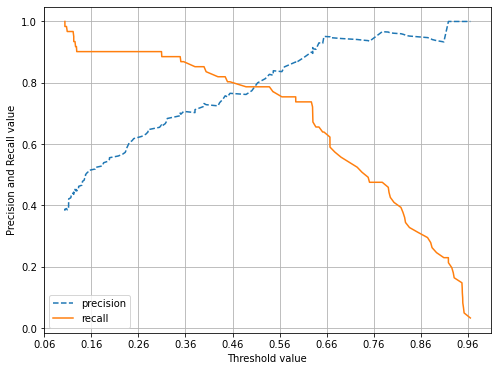

In [67]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

## F1 score

In [70]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print(f'f1 score : {f1:.3f}')

f1 score : 0.780


In [71]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1:{3:4f}'.format(accuracy, precision, recall, f1))

In [72]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_class1)

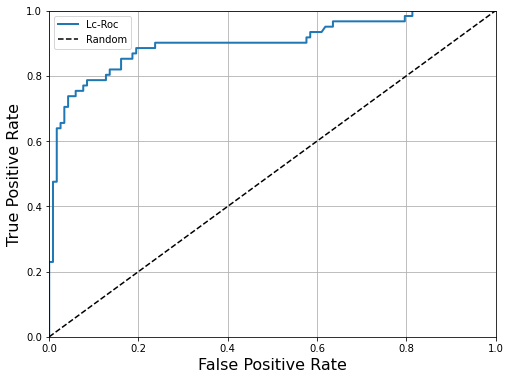

In [74]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize = 16)
    plt.ylabel('True Positive Rate', fontsize = 16)
    plt.grid(True)
    
plt.figure(figsize = (8, 6))
plot_roc_curve(fpr, tpr)
plt.legend(['Lc-Roc', 'Random'], loc = 'best')
plt.show()

In [75]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
forest_clf.fit(X_train, y_train)
y_probas_forest = forest_clf.predict_proba(X_test)

In [76]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_scores_forest)

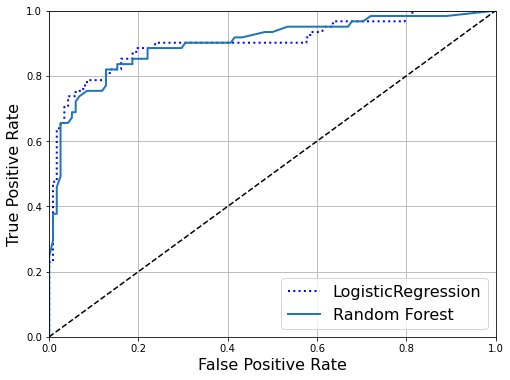

In [77]:
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, 'b:', linewidth = 2, label = 'LogisticRegression')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.grid(True)
plt.legend(loc = 'best', fontsize = 16)
plt.show()

## 평가지표 활용

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2, random_state = 156, stratify = y)

In [84]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TypeError: get_clf_eval() takes 2 positional arguments but 3 were given